In [1]:
import tarfile

file_path = "rgz108k_data/rgz108k-batches-python.tar.gz"
extract_dir = "rgz108k_data"

try:
    with tarfile.open(file_path, "r:gz") as tar:
        tar.extractall(path=extract_dir)
    print("File extracted successfully!")
except Exception as e:
    print(f"Extraction failed: {e}")


Extraction failed: [Errno 2] No such file or directory: 'rgz108k_data/rgz108k-batches-python.tar.gz'


In [2]:
!ls
!ls rgz108k_data

 Cross_check_LoTSS.ipynb    coordinates.xlsx  '~$coordinates.xlsx'
'RGZ to CoOrdinate.ipynb'   rgz20k
ls: cannot access 'rgz108k_data': No such file or directory


In [3]:
import pickle

# Path to the batches.meta file
meta_file_path = "./rgz20k/batches.meta"

# Load the metadata file
with open(meta_file_path, "rb") as f:
    meta = pickle.load(f, encoding="latin1")  # Use "latin1" for compatibility

# Print the content of the metadata file
print("Metadata file content:")
for key, value in meta.items():
    print(f"{key}: {value}")


Metadata file content:
label_names: ['']


In [4]:
import os
import pickle
import numpy as np

# Path to the extracted dataset
dataset_root = "./rgz20k"

# List of batch files (excluding the test batch for now)
batch_files = [f"data_batch_{i}" for i in range(1, 11)]  # Modify range as needed
batch_files.append("test_batch")  # Include test batch if required

# Initialize arrays to store the loaded data
data = []
filenames = []
src_ids = []
mb_flags = []
las_sizes = []

# Load each batch file
for batch_file in batch_files:
    batch_path = os.path.join(dataset_root, batch_file)
    with open(batch_path, "rb") as f:
        batch = pickle.load(f, encoding="latin1")
        data.append(batch["data"])
        filenames.extend(batch["filenames"])
        src_ids.extend(batch["src_ids"])
        mb_flags.extend(batch["mb_flag"])
        las_sizes.extend(batch["LAS"])

# Stack and reshape the data into images
data = np.vstack(data).reshape(-1, 1, 150, 150)  # Assuming data format is 150x150 grayscale
data = data.transpose((0, 2, 3, 1))  # Channels-last format for compatibility

# Print a summary of the dataset
print(f"Loaded {len(data)} images")
print(f"Example filenames: {filenames[:5]}")
print(f"Example source IDs: {src_ids[:5]}")
print(f"Example MiraBest flags: {mb_flags[:5]}")
print(f"Example largest angular sizes (LAS): {las_sizes[:5]}")


Loaded 22000 images
Example filenames: ['FIRST_RGZJ134541.2+232253.png', 'FIRST_RGZJ143121.3+232251.png', 'FIRST_RGZJ105512.0+232306.png', 'FIRST_RGZJ084831.6+232245.png', 'FIRST_RGZJ171515.3+232247.png']
Example source IDs: ['RGZJ134541.2+232253', 'RGZJ143121.3+232251', 'RGZJ105512.0+232306', 'RGZJ084831.6+232245', 'RGZJ171515.3+232247']
Example MiraBest flags: [0, 0, 0, 0, 0]
Example largest angular sizes (LAS): [37.8315066795, 18.5484577738, 37.3640868771, 15.2297577915, 27.3976890128]


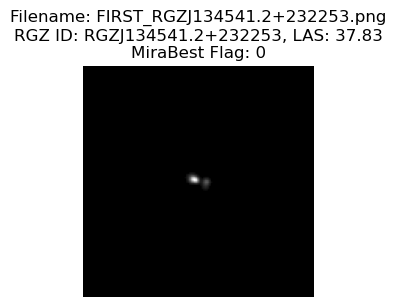

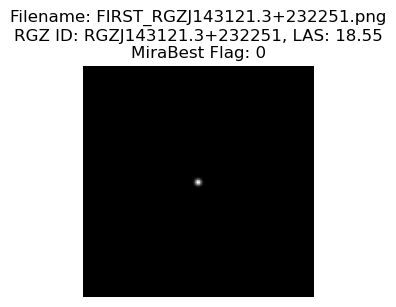

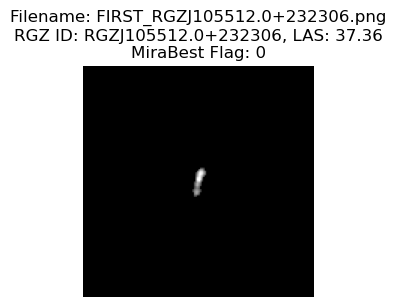

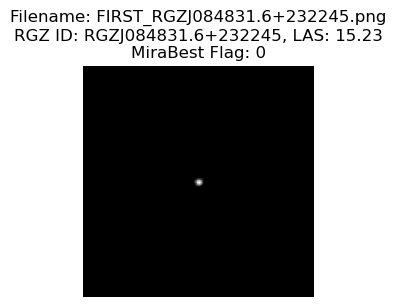

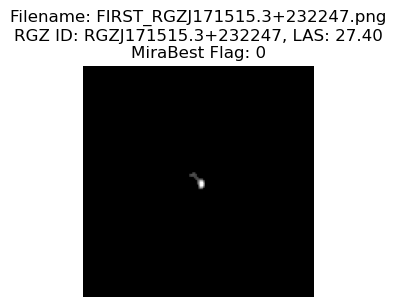

In [5]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Path to the dataset and the batch file
dataset_root = "./rgz20k"
batch_file = "data_batch_1"
batch_path = os.path.join(dataset_root, batch_file)

# Load the batch file
with open(batch_path, "rb") as f:
    batch = pickle.load(f, encoding="latin1")  # Use "latin1" for compatibility

# Extract data and metadata
data = np.array(batch["data"])  # Convert list to NumPy array
filenames = batch["filenames"]
src_ids = batch["src_ids"]
mb_flags = batch["mb_flag"]
las_sizes = batch["LAS"]

# Reshape the data into images (150x150 grayscale)
data = data.reshape(-1, 1, 150, 150).transpose((0, 2, 3, 1))  # Channels-last format

# Display the first 5 images with metadata
for i in range(5):
    img = data[i].squeeze()  # Remove single-channel dimension
    plt.figure(figsize=(3, 3))
    plt.imshow(img, cmap="gray")
    plt.title(f"Filename: {filenames[i]}\nRGZ ID: {src_ids[i]}, LAS: {las_sizes[i]:.2f}\nMiraBest Flag: {mb_flags[i]}")
    plt.axis("off")
    plt.show()


In [6]:
import os
import pickle
import numpy as np
import pandas as pd

# Path to the dataset
dataset_root = "./rgz20k"

# List of all batch files
batch_files = [f"data_batch_{i}" for i in range(1, 11)] + ["test_batch"]

# Initialize lists to store all data
all_filenames = []
all_src_ids = []
all_mb_flags = []
all_las_sizes = []

# Process each batch file
for batch_file in batch_files:
    batch_path = os.path.join(dataset_root, batch_file)
    with open(batch_path, "rb") as f:
        batch = pickle.load(f, encoding="latin1")
        
        # Extract data and metadata
        all_filenames.extend(batch["filenames"])
        all_src_ids.extend(batch["src_ids"])
        all_mb_flags.extend(batch["mb_flag"])
        all_las_sizes.extend(batch["LAS"])

# Create a DataFrame
data = {
    "Filename": all_filenames,
    "RGZ_ID": all_src_ids,
    "MiraBest_Flag": all_mb_flags,
    "Largest_Angular_Size": all_las_sizes,
}

df = pd.DataFrame(data)

# Save the DataFrame to an Excel file
output_path = os.path.join(dataset_root, "RGZ108k_Metadata.xlsx")
df.to_excel(output_path, index=False)

print(f"Metadata successfully saved to {output_path}")


Metadata successfully saved to ./rgz20k/RGZ108k_Metadata.xlsx


In [8]:
import pandas as pd

# Path to the existing Excel file
input_file_path = "./rgz20k/RGZ108k_Metadata.xlsx"
output_file_path = "./rgz20k/RGZ108k_Metadata_with_Object_ID.xlsx"

# Load the existing Excel file into a DataFrame
df = pd.read_excel(input_file_path)

# Create the Object_ID column by removing the "RGZ" prefix from the RGZ_ID column
df["Object_ID"] = df["RGZ_ID"].apply(lambda x: x[3:] if isinstance(x, str) and x.startswith("RGZ") else x)

# Save the updated DataFrame to a new Excel file
df.to_excel(output_file_path, index=False)

print(f"Updated Excel file saved to: {output_file_path}")


Updated Excel file saved to: ./rgz20k/RGZ108k_Metadata_with_Object_ID.xlsx


In [9]:
import os
import pickle

# Path to a batch file
dataset_root = "./rgz20k"
batch_file = "data_batch_1"  # Replace with any other batch file if needed
batch_path = os.path.join(dataset_root, batch_file)

# Load the batch file
with open(batch_path, "rb") as f:
    batch = pickle.load(f, encoding="latin1")  # Use "latin1" for compatibility

# Inspect the keys and their types
print("Keys in the batch file:")
for key in batch.keys():
    print(f"{key}: {type(batch[key])}")

# Optionally inspect some data for each key
print("\nSample values:")
for key, value in batch.items():
    if isinstance(value, list):
        print(f"{key}: {value[:3]}")  # Show first 3 items for lists
    elif isinstance(value, np.ndarray):
        print(f"{key}: ndarray with shape {value.shape}")
    else:
        print(f"{key}: {value}")


Keys in the batch file:
batch_label: <class 'str'>
data: <class 'list'>
filenames: <class 'list'>
src_ids: <class 'list'>
mb_flag: <class 'list'>
LAS: <class 'list'>

Sample values:
batch_label: training batch 1 of 10
data: [array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8), array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)]
filenames: ['FIRST_RGZJ134541.2+232253.png', 'FIRST_RGZJ143121.3+232251.png', 'FIRST_RGZJ105512.0+232306.png']
src_ids: ['RGZJ134541.2+232253', 'RGZJ143121.3+232251', 'RGZJ105512.0+232306']
mb_flag: [0, 0, 0]
LAS: [37.8315066795, 18.5484577738, 37.3640868771]


In [10]:
import pandas as pd

# Path to the existing Excel file and output path
input_file_path = "./rgz20k/RGZ108k_Metadata_with_Object_ID.xlsx"
output_file_path = "./rgz20k/RGZ108k_Metadata_with_RA_Dec.xlsx"

# Load the existing Excel file into a DataFrame
df = pd.read_excel(input_file_path)

# Function to parse RA and Dec from RGZ_ID
def parse_ra_dec(src_id):
    if not isinstance(src_id, str) or not src_id.startswith("RGZJ"):
        return None, None  # Handle invalid or missing IDs
    
    coords = src_id[4:]  # Remove the "RGZJ" prefix
    
    try:
        # Split into RA and Dec parts
        ra_str, dec_str = coords[:8], coords[8:]
        
        # Parse RA
        ra_h = int(ra_str[:2])  # Hours
        ra_m = int(ra_str[2:4])  # Minutes
        ra_s = float(ra_str[4:8])  # Seconds
        ra_deg = (ra_h + ra_m / 60 + ra_s / 3600) * 15  # Convert to degrees (multiplied by 15 for RA)
        
        # Parse Dec
        dec_sign = 1 if dec_str[0] == '+' else -1
        dec_d = int(dec_str[1:3])  # Degrees
        dec_m = int(dec_str[3:5])  # Arcminutes
        dec_s = int(dec_str[5:])  # Arcseconds
        dec_deg = dec_sign * (dec_d + dec_m / 60 + dec_s / 3600)  # Convert to decimal degrees
        
        return ra_deg, dec_deg
    
    except (ValueError, IndexError) as e:
        print(f"Error parsing RGZ_ID: {src_id}, Error: {e}")
        return None, None

# Apply the parsing function to the 'RGZ_ID' column and fill in the RA and Dec columns
df[["RA (degrees)", "Dec (degrees)"]] = df["RGZ_ID"].apply(
    lambda x: pd.Series(parse_ra_dec(x))
)

# Save the updated DataFrame to a new Excel file
df.to_excel(output_file_path, index=False)

print(f"Updated Excel file saved to: {output_file_path}")


Updated Excel file saved to: ./rgz20k/RGZ108k_Metadata_with_RA_Dec.xlsx
